# Dino Project

* Run on https://chromedino.com
* Get screen capture
* Contour image's object
* Make dino go up and go down 

Lib to use for image traitmente:

In [1]:
from PIL import ImageGrab, Image, ImageOps

Automate Dino mouvmente: control gaming

In [2]:
import pyautogui
import time

Image treatment

In [3]:
import cv2
import numpy as np

### Start dev

##### Game control

In [4]:
def Up():
    pyautogui.press('up')
    print('heello')
    time.sleep(0.25)
    pyautogui.press('down')

#pyautogui.hotkey('ctrl','tab')
pyautogui.click(x=1000,y=200,clicks=1,duration=1,button='left')
pyautogui.press('up')
while True:
    box = (1100, 450, 1400, 500)
    im = ImageOps.grayscale(ImageGrab.grab(bbox=box))
    a = array(im.getcolors())
    a = int(a.sum())
    time.sleep(.095)
    print(a)
    if a== 32307 or a ==32103 or a==32101 or a==32084 or a == 30903 or a==28269 or a==34576 or a==34029 or a==33431 or a==33097 or a==33469 or a == 33209 or a==30945 or a==31378 or a==29808 or a == 28449 or a==30470 or a==30486 or a == 32403 or a == 271467 or a == 33616 or a == 33196 or a == 32403:
        #im.show()
        #break
        print('up',a)
        pyautogui.keyDown('up')
        #pyautogui.keyUp('up')
        #pyautogui.press('up')
        #time.sleep(0.085)
        #pyautogui.press('down')
    

##### Get image

In [5]:
#Position of the game on the window
im = ImageGrab.grab(bbox=(2000, 450,3100, 800))  # X1,Y1,X2,Y2
im.show()

In [ ]:
# to file
#im.save('dino2.png')

In [7]:
# Open image
#img = Image.open('dino2.png')
#img.show()

In [75]:
img_array = np.array(im)

##### Detect edges in image

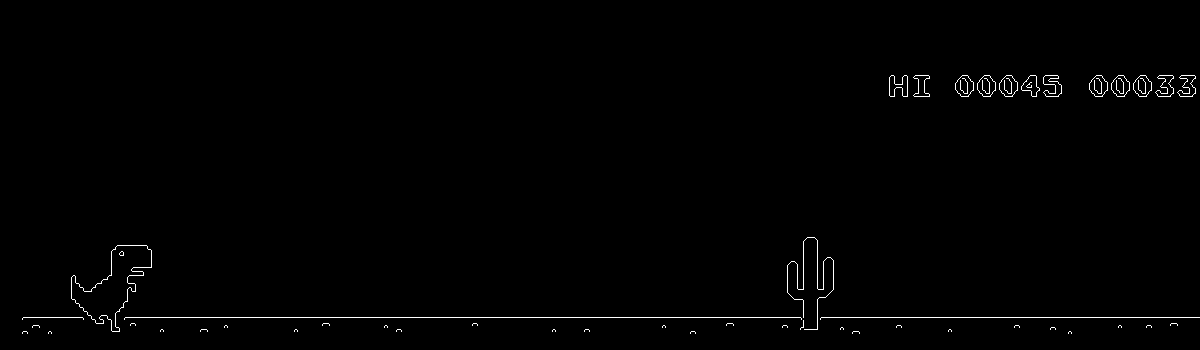

In [76]:
img_edges = cv2.Canny(img_array,100,200)
Image.fromarray(img_edges)

##### Mask image

In [153]:
def extract_game(img):
    mask = np.zeros_like(img)
    mask[250:1200,250:1200] = 255
    masked = cv2.bitwise_and(img,mask)
    return masked

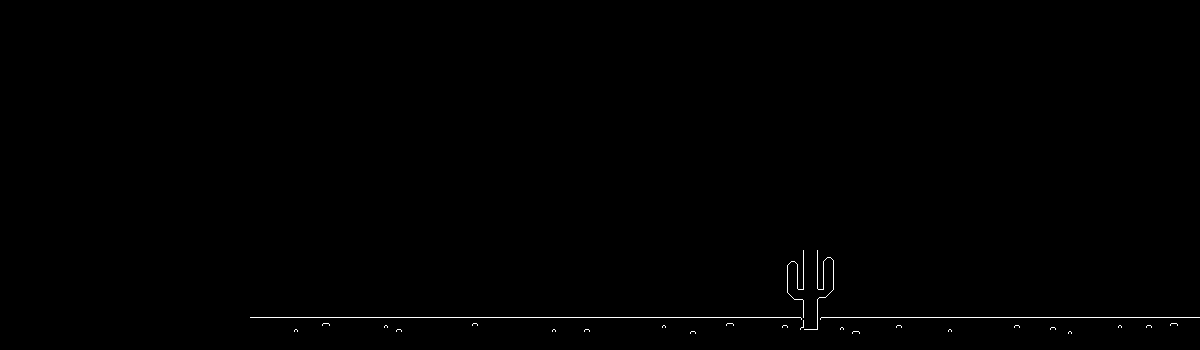

In [154]:
img_mask = extract_game(img_edges)
Image.fromarray(img_mask)

##### Erosion

In [92]:
kernel = np.ones((4,1),np.uint8)
erosion = cv2.erode(img_mask,kernel,iterations = 2)

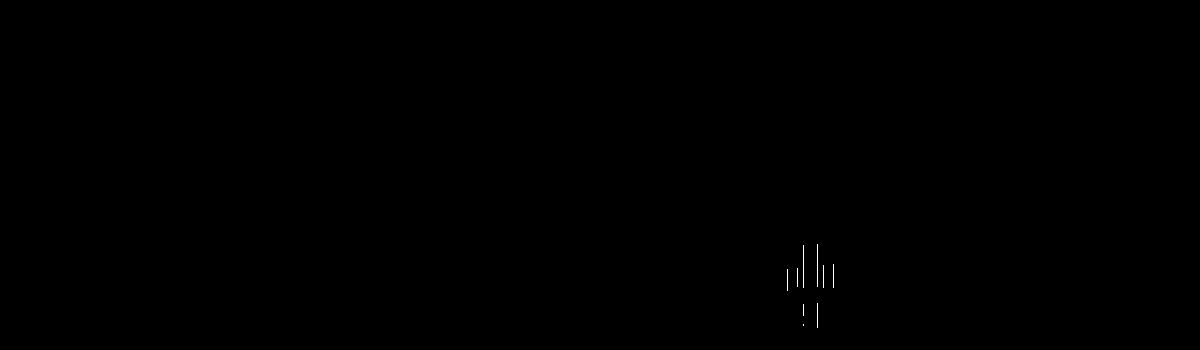

In [93]:
Image.fromarray(erosion)

##### Dilatation

In [94]:
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations =2)

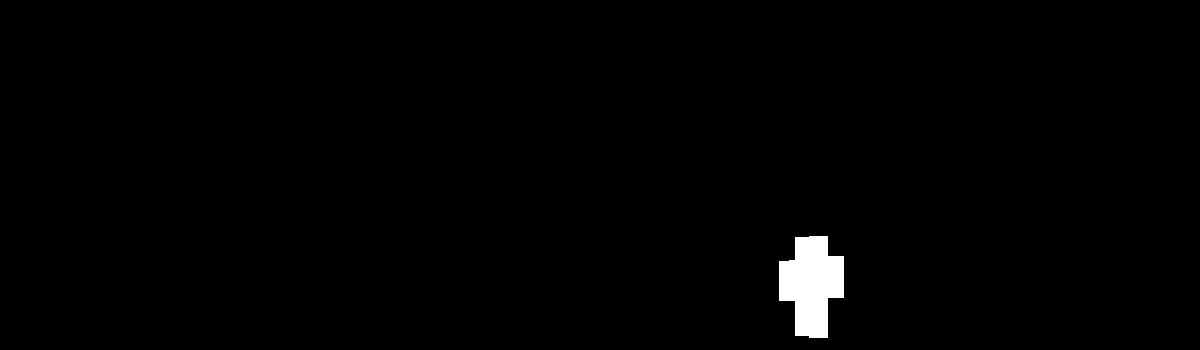

In [95]:
Image.fromarray(dilation)

##### Find contours

In [96]:

image_contours, contours, hierarchy = cv2.findContours(dilation.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


In [97]:
image_contours = cv2.cvtColor(image_contours,cv2.COLOR_GRAY2BGR)
img_co = cv2.drawContours(image_contours, contours, -1, (255,0,0), 3)

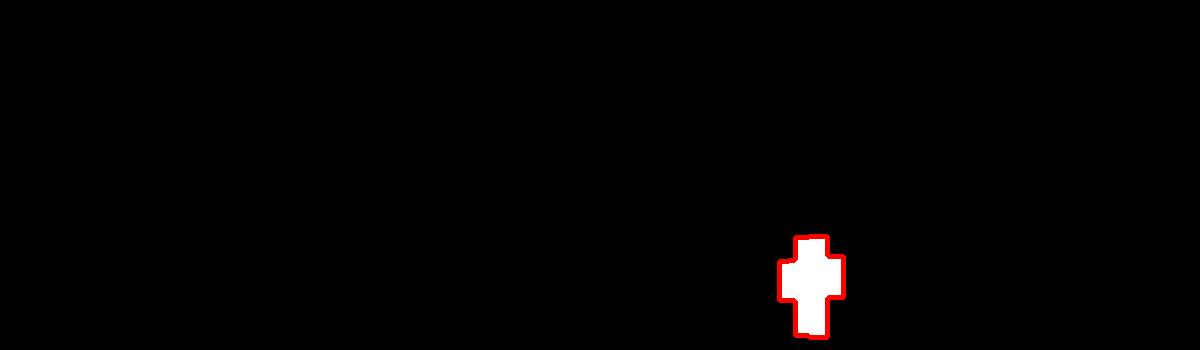

In [98]:
Image.fromarray(img_co)

##### Extract object position

In [99]:
len(contours)

1

In [100]:
contours[0][0]

array([[809, 236]], dtype=int32)

In [101]:
contours[0].min(axis=0)[0][0]

779

In [102]:
contours[1].min(axis=0)[0][0]

IndexError: list index out of range

In [103]:
img_co.shape

(350, 1200, 3)

In [104]:
#Draw line
draw_line = img_co.copy()
cv2.line(draw_line,(762,0),(762,350),(255,0,0),3)
cv2.line(draw_line,(202,0),(202,350),(255,0,0),3)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

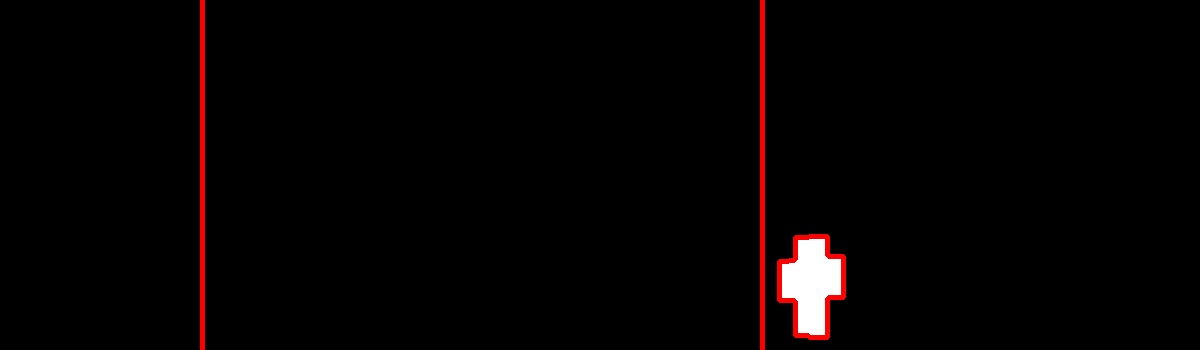

In [105]:
Image.fromarray(draw_line)

### Process function 

In [155]:
def mProcessImage(img):
    img_edges = cv2.Canny(img,100,200)
    img_mask = extract_game(img_edges)
    kernel = np.ones((4,1),np.uint8)
    erosion = cv2.erode(img_mask,kernel,iterations = 2)
    kernel = np.ones((10,10),np.uint8)
    dilation = cv2.dilate(erosion,kernel,iterations =2)
    image_contours, contours, hierarchy = cv2.findContours(dilation.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    image_contours = cv2.cvtColor(image_contours,cv2.COLOR_GRAY2BGR)
    img_co = cv2.drawContours(image_contours, contours, -1, (255,0,0), 3)
    #To modify
    lLenContours = list(sorted([y.min(axis = 0)[0][0] for y in contours]))
    for i in lLenContours:
        cv2.line(img_co,(i,0),(i,img_co.shape[0]),(255,0,0),3)
    dist = 0
    if len(lLenContours)>0:
        dist = lLenContours[0]
    return img_co,dist

##### Test function: mProcessImage

In [107]:
img = Image.open('dino2.png')

tab_img = np.array(im)

In [108]:
img_test_fct = mProcessImage(tab_img)
Image.fromarray(img_test_fct)

AttributeError: 'tuple' object has no attribute '__array_interface__'

##### Dino automation

In [42]:
ImageGrab.grab(bbox=(2000, 400,3100, 750)).show()

0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
0 0 0
5787990 991 0
5787990 835 0
5787990 677 1
5787990 523 2
5787990 365 3
0 0 4
3412155 1093 0
3412155 925 0
3412155 757 1
6824310 591 2
6824310 435 0
3412155 691 1
9221820 523 0
9221820 367 0
5809665 625 1
5809665 457 0
3299700 249 1
5618415 873 0
5618415 705 0
5618415 535 1
5618415 367 2
0 0 3
0 0 0
3412155 1019 0
3412155 849 0
3412155 675 1
5734695 517 2
5734695 251 0
7964925 563 1
7964925 395 0
5642385 445 1
5513355 243 0
4830975 579 0
4830975 579 0
4830975 579 1
4830975 579 2
4830975 579 3
4830975 579 4


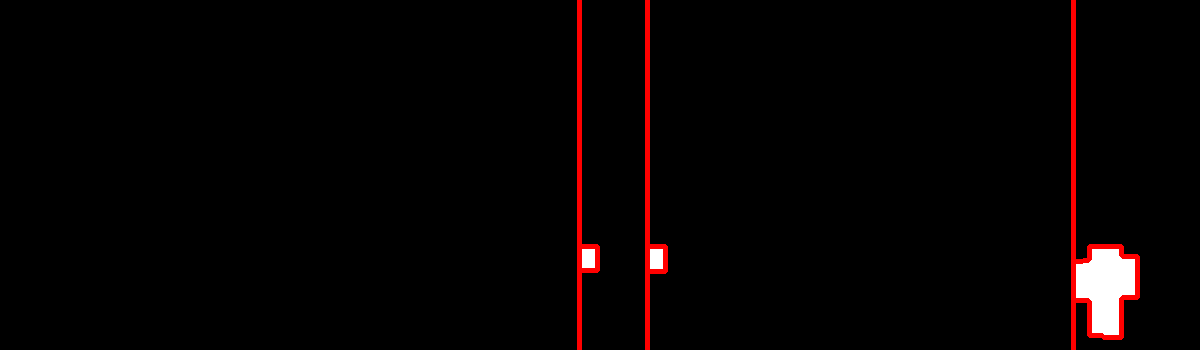

In [162]:
#pyautogui.hotkey('ctrl','tab')
pyautogui.click(x=1000,y=200,clicks=1,duration=1,button='left')
pyautogui.press('up')
histo = -1
count = 0
while True:
    #Position of the game on the window
    im = ImageGrab.grab(bbox=(1900, 450,3100, 800))  # X1,Y1,X2,Y2
    tab_im = np.array(im)
    img,dist = mProcessImage(tab_im)
    a = int(img.sum())
    print(str(a)+" "+str(dist)+" "+str(count))
    if a>0 and dist < 520: 
        #time.sleep(.050)
        pyautogui.press('up')
        
    if histo == a and a>0:
        count = count + 1
        if count > 4:
            break
    else:
        count = 0
    histo = a
Image.fromarray(img)

### Stop game

In [14]:
#Position of the game on the window
im = ImageGrab.grab(bbox=(2050, 400,3000, 600))  # X1,Y1,X2,Y2
im.show()

In [4]:
def mGameOver(img):
    img_edges = cv2.Canny(img,100,200)
    img_mask = extract_game(img_edges)
    kernel = np.ones((1,4),np.uint8)
    erosion = cv2.erode(img_mask,kernel,iterations = 2)
    kernel = np.ones((10,10),np.uint8)
    dilation = cv2.dilate(erosion,kernel,iterations =2)
    image_contours, contours, hierarchy = cv2.findContours(dilation.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    image_contours = cv2.cvtColor(image_contours,cv2.COLOR_GRAY2BGR)
    img_co = cv2.drawContours(image_contours, contours, -1, (255,0,0), 3)
    
    #To modify
    lLenContours = list(sorted([y.min(axis = 0)[0][0] for y in contours]))
    for i in lLenContours:
        cv2.line(img_co,(i,0),(i,img_co.shape[0]),(255,0,0),3)
    dist = 0
    if len(lLenContours)>0:
        dist = lLenContours[0]
    return img_co,dist